<h1> <center> Explaining the problem

The company ABC SA(ficticious name) whishes to reduce the amount of fines received by not accounting correctly the intercompany invoices. That is, somes invoices are issued by one of its stores to be received by another one. Although the products invoice are correctly delivered, the receiver does not account the invoice, creating a distortion between the amount of products in its physical inventory when compared to the accounted inventory. This problem can also be seen as below:

<img src = "flowchart.png">

As a better solution and improved value delivery for our client, we tried to develop a machine learning model capable of predicting which invoices have a bigger chance to not be accounted, opening the possibility to control and track the correct accounting of the products on the receiver.

<h1> <center> Create Machine Learning model

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

First of all, the databases delivered by our client were labeled between correctly accounted (0) and not accounted (1). We then used a Standard scaler to reduce data scaled differences, randomized the data for prevent information leak and created the databases below: df_train and df_test, which are already randomically distributed in a 0.8 and 0.2 proportion of the entire database, respectively.

In [17]:
df_train = pd.read_csv("C:\\Users\\Fabio\\Documents\\Programacao\\Python\\Dashboard\\databases_final\\df_train.csv", sep = "|")

In [18]:
df_test = pd.read_csv("C:\\Users\\Fabio\\Documents\\Programacao\\Python\\Dashboard\\databases_final\\df_test.csv", sep = "|")

In [19]:
x_train = df_train.iloc[:,:-1].values

In [20]:
x_test = df_test.iloc[:,:-1].values

In [21]:
y_train = df_train.iloc[:,len(df_train.columns)-1:].values.ravel()

In [22]:
y_test = df_test.iloc[:, len(df_test.columns)-1:].values.ravel()

<h2> <center> Testando regressão logística

Second, we tried a Logistic Regression model. The result shown below is a roc_auc_score of 0.7414, representing a not so good machine learning model.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression(random_state = 0).fit(x_train, y_train)

In [25]:
clf.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
prob = clf.predict_proba(x_test)

In [27]:
clf.score(x_train, y_train)

0.8774129813887618

In [47]:
roc_auc_score(y_test, prob[:, 1])

0.7413863059337873

In [65]:
false_pos_rate, true_pos_rate, threshold = metrics.roc_curve(y_test, prob[:, 1])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate)

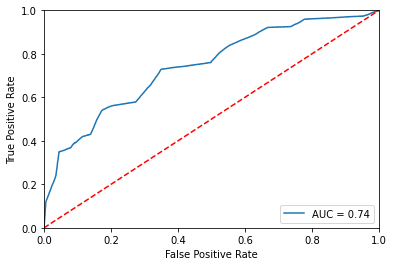

In [66]:
plt.plot(false_pos_rate, true_pos_rate, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h2> <center> Testando árvore de decisão

Third, we tried a Decision Tree Classifier, which showed a much better accuracy with just 10 leaves, representing a roc_auc_score of 0.8474

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt_clf = DecisionTreeClassifier(random_state = 0, max_depth = 10)

In [30]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [31]:
dt_clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
dt_prob = dt_clf.predict_proba(x_test)

In [51]:
roc_auc_score(y_test, dt_prob[:, 1])

0.8474342141024354

In [62]:
false_pos_rate_dt, true_pos_rate_dt, threshold_dt = metrics.roc_curve(y_test, dt_prob[:, 1])
roc_auc_dt = metrics.auc(false_pos_rate_dt, true_pos_rate_dt)

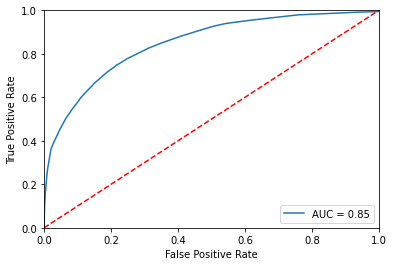

In [63]:
plt.plot(false_pos_rate_dt, true_pos_rate_dt, label = 'AUC = %0.2f' % roc_auc_dt)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()